Group: Noah Little, Zach Healy, Jack Stout, Jacob Thieret, Justin Kehoe, Collyn Rouggly, Momoh Brema

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize data
df = pd.read_csv('athlete_events.csv', usecols=['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
                                                'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])

## Clean Data
- Convert height to feet
- Convert weight to pounds

In [2]:
# Convert data into imperial units
df['Height'] = df['Height'] / 30.48
df['Weight'] = df['Weight'] * 2.20462

## Overview of data

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,5.905512,176.36960,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,5.577428,132.27720,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,6.069554,180.77884,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Male and Female Weight/Height Scatterplot

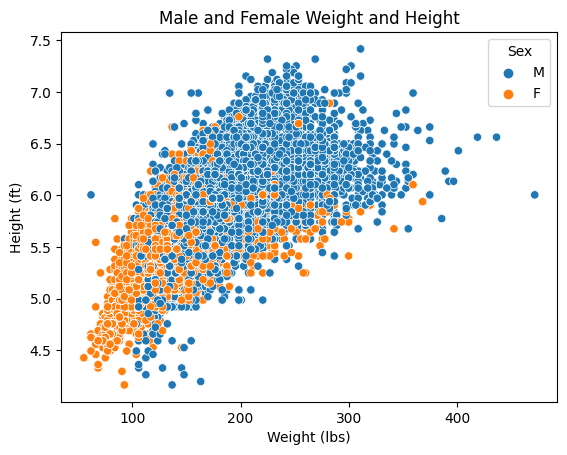

In [4]:
# Male and Female Weight and Height
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=df)
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (ft)')
plt.title('Male and Female Weight and Height')
plt.show()

As we may have assumed the height and weight is in general greater for the male athletes than the female athlese

## Atheletes per Year by Sex

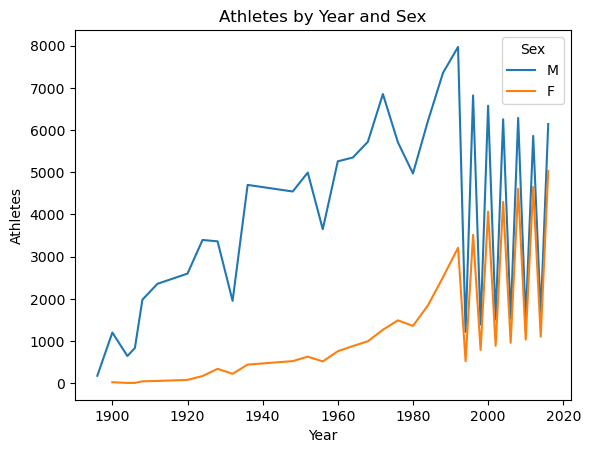

In [5]:
# Athletes by year and sex
year_sex_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
sns.lineplot(x='Year', y='ID', hue='Sex', data=year_sex_counts)
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.title('Athletes by Year and Sex')
plt.show()

We can determine that there was probably less collected data during the early 1900s, but we can see the number of male athletes was significantly higher during the 1900s. Then in the 2000s the number of female athletes increased greatly almost getting lose to the number of male athletes.

## Average number of athletes per year for each country

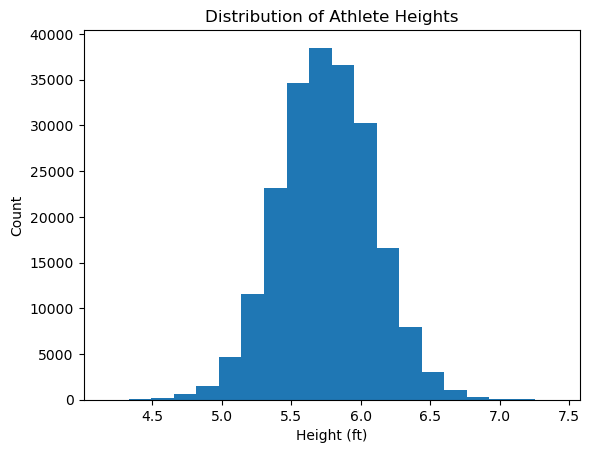

In [11]:
# Extract the Height column and convert to a NumPy array
heights = np.array(df['Height'])

# Plot a histogram of the heights
plt.hist(heights, bins=20)
plt.xlabel('Height (ft)')
plt.ylabel('Count')
plt.title('Distribution of Athlete Heights')
plt.show()

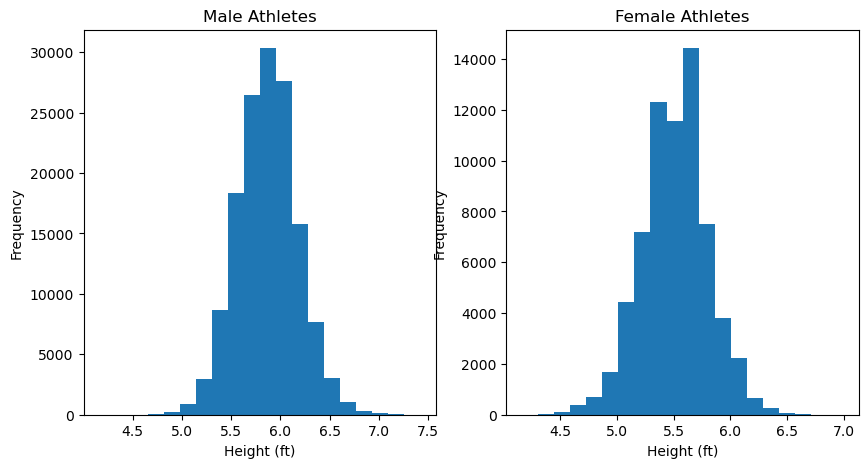

In [12]:
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

# plot histograms of height for each gender
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.hist(male_df['Height'], bins=20)
ax1.set_xlabel('Height (ft)')
ax1.set_ylabel('Frequency')
ax1.set_title('Male Athletes')
ax2.hist(female_df['Height'], bins=20)
ax2.set_xlabel('Height (ft)')
ax2.set_ylabel('Frequency')
ax2.set_title('Female Athletes')
plt.show()

In [6]:
""""
counted = df.groupby(['Team', 'Year']).size()

# calculate the average number of athletes for each team over the years
avg_num_athletes = counted.groupby([]'Team').mean().nlargest(10)

# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes
avg_num_athletes.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average number of athletes')
plt.title('Average number of athletes per team over the years')
plt.show()
"""

'"\ncounted = df.groupby([\'Team\', \'Year\']).size()\n\n# calculate the average number of athletes for each team over the years\navg_num_athletes = counted.groupby([]\'Team\').mean().nlargest(10)\n\n# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes\navg_num_athletes.plot(kind=\'bar\')\nplt.xlabel(\'Country\')\nplt.ylabel(\'Average number of athletes\')\nplt.title(\'Average number of athletes per team over the years\')\nplt.show()\n'

## Medal Counts by Country

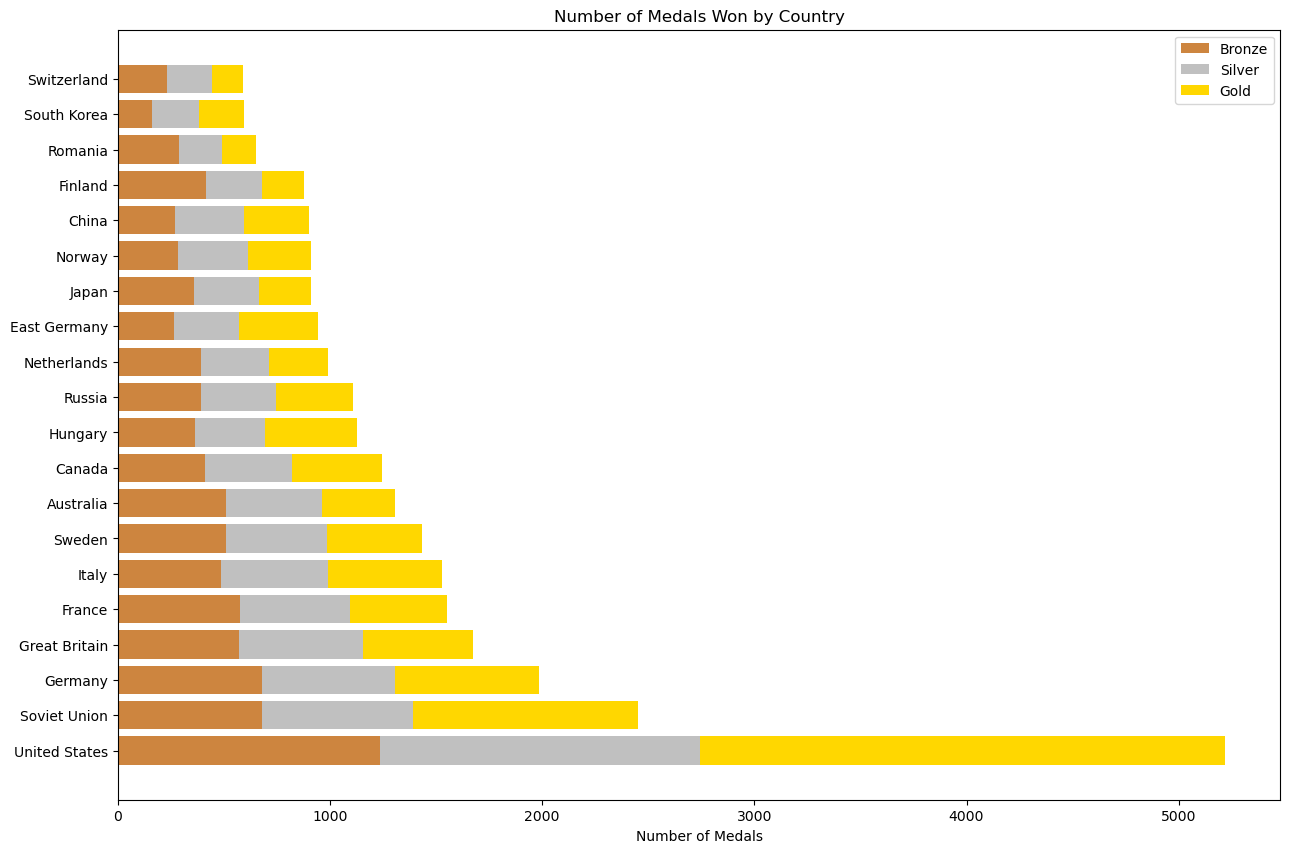

In [7]:
# Separate medal counts by country
gold = df[df['Medal'] == 'Gold'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Gold'})
silver = df[df['Medal'] == 'Silver'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Silver'})
bronze = df[df['Medal'] == 'Bronze'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Bronze'})

# Merge dataframes
medals = pd.merge(bronze, silver, on='Team', how='outer')
medals = pd.merge(medals, gold, on='Team', how='outer')
medals = medals.fillna(0)
medals['Total'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

# Sort medals
medals = medals.sort_values('Total', ascending=False).head(20)

# Create bar plot
plt.figure(figsize=(15, 10))
plt.barh(medals['Team'], medals['Bronze'], color='peru', label='Bronze')
plt.barh(medals['Team'], medals['Silver'], left=medals['Bronze'], color='silver', label='Silver')
plt.barh(medals['Team'], medals['Gold'], left=medals['Bronze'] + medals['Silver'], color='gold', label='Gold')
plt.xlabel('Number of Medals')
plt.title('Number of Medals Won by Country')
plt.legend()
plt.show()


## Country Medals by Decade Heatmap

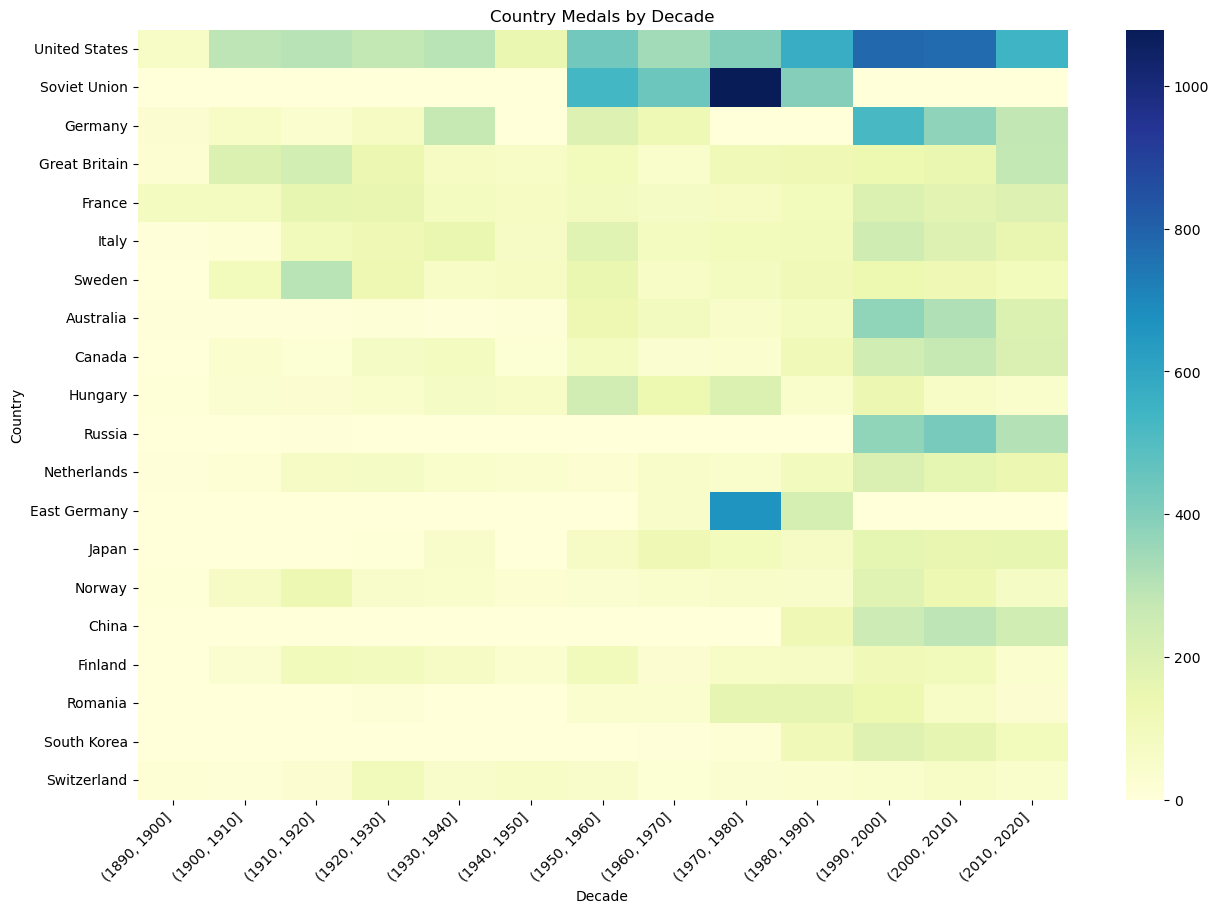

In [8]:
bins = np.arange(1890, 2021, 10)
medals_by_country_decade = df.groupby(['Team', pd.cut(df['Year'], bins=bins)])['Medal'].count().reset_index().pivot(index='Team', columns='Year', values='Medal')
medals = df.groupby('Team')['Medal'].count().reset_index().sort_values('Medal', ascending=False).head(20)

medals_by_country_decade = medals_by_country_decade.loc[medals['Team'], :]

# Create heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(medals_by_country_decade, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Decade')
plt.ylabel('Country')
plt.title('Country Medals by Decade')
plt.show()


C:\Users\jacob\AppData\Local\Temp\ipykernel_19200\3904366456.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()


The sport with the tallest average males is Basketball, with an average height of 6.4 ft
The sport with the tallest average females is Basketball, with an average height of 6.0 ft
['Alpine Skiing' 'Archery' 'Art Competitions' 'Athletics' 'Badminton'
 'Baseball' 'Basketball' 'Beach Volleyball' 'Biathlon' 'Bobsleigh'
 'Boxing' 'Canoeing' 'Cross Country Skiing' 'Curling' 'Cycling' 'Diving'
 'Equestrianism' 'Fencing' 'Figure Skating' 'Football' 'Freestyle Skiing'
 'Golf' 'Gymnastics' 'Handball' 'Hockey' 'Ice Hockey' 'Jeu De Paume'
 'Judo' 'Lacrosse' 'Luge' 'Modern Pentathlon' 'Motorboating'
 'Nordic Combined' 'Polo' 'Racquets' 'Rhythmic Gymnastics' 'Rowing'
 'Rugby' 'Rugby Sevens' 'Sailing' 'Shooting' 'Short Track Speed Skating'
 'Skeleton' 'Ski Jumping' 'Snowboarding' 'Softball' 'Speed Skating'
 'Swimming' 'Synchronized Swimming' 'Table Tennis' 'Taekwondo' 'Tennis'
 'Trampolining' 'Triathlon' 'Tug-Of-War' 'Volleyball' 'Water Polo'
 'Weightlifting' 'Wrestling']


C:\Users\jacob\AppData\Local\Temp\ipykernel_19200\3904366456.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


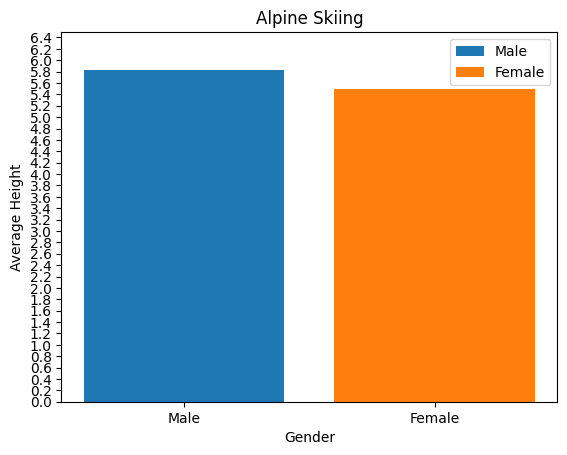

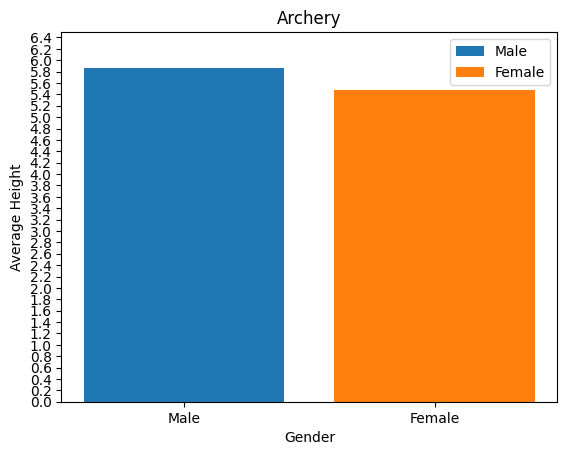

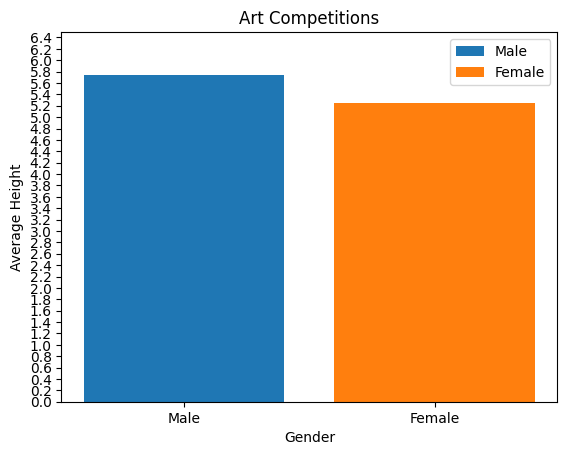

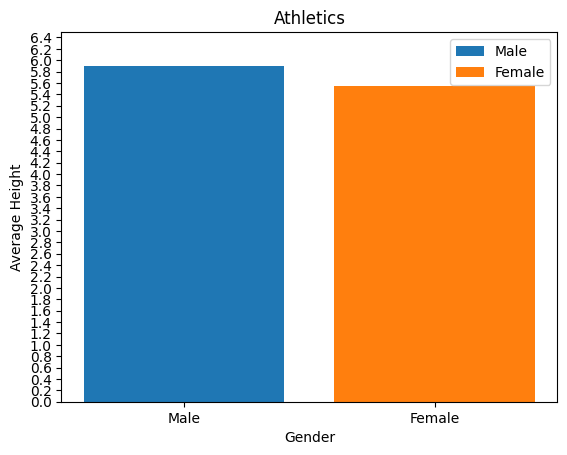

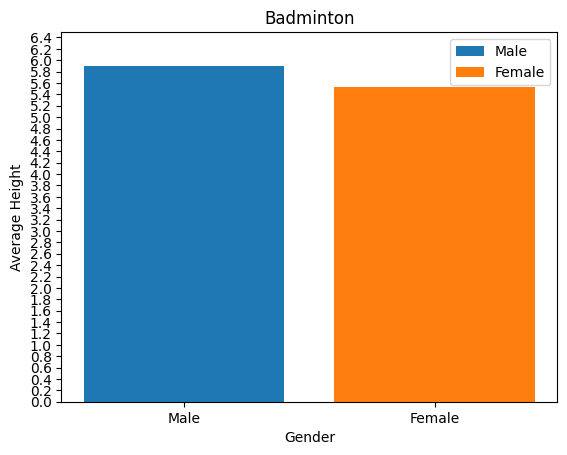

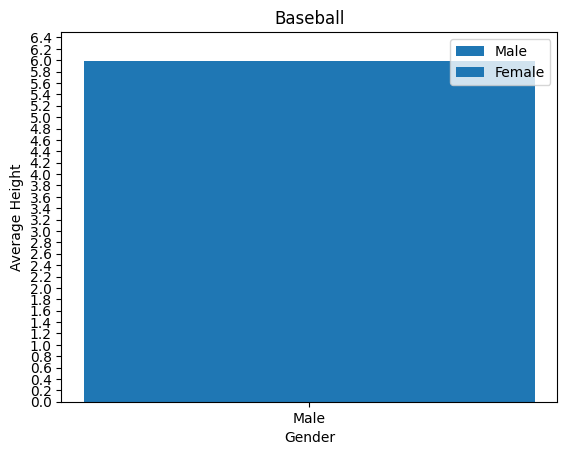

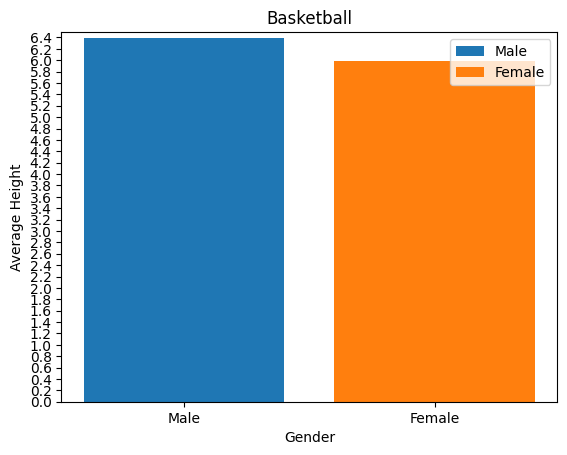

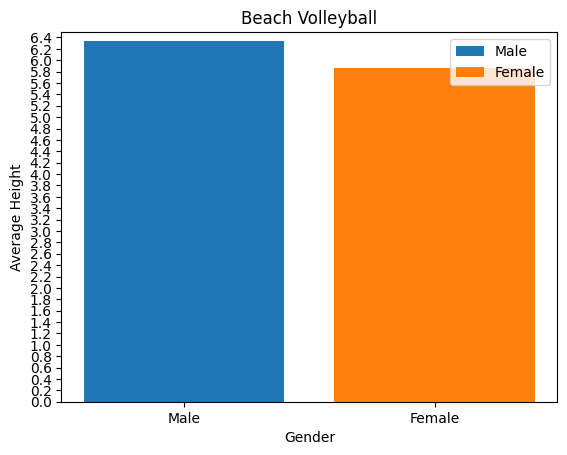

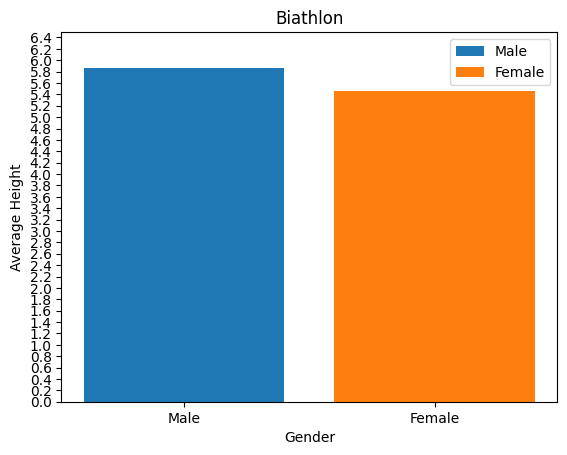

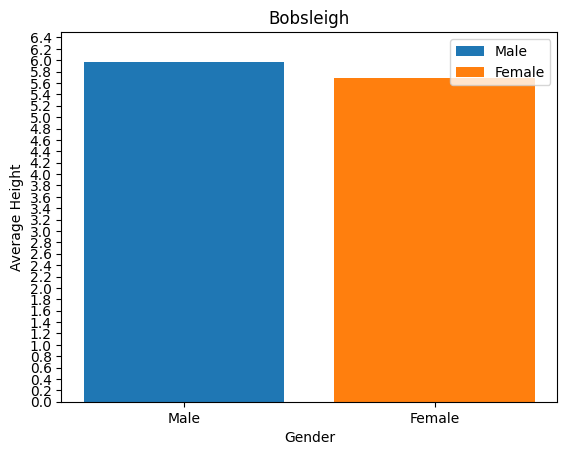

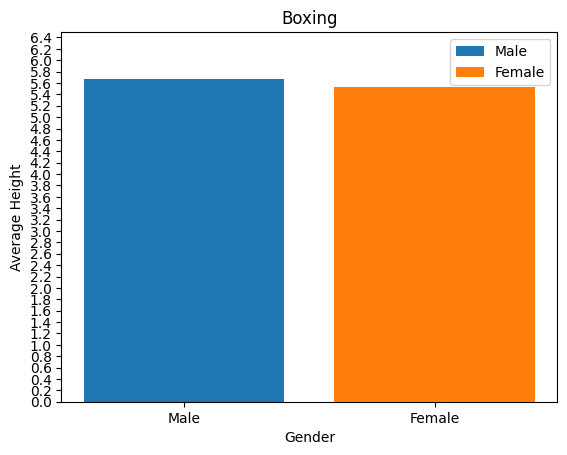

In [10]:
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()
df = df.dropna(subset=['Height'])

max_male_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'M', 'Height'].max()
max_female_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'F', 'Height'].max()
sport_with_tallest_avg_male = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'M') & (gb_sport_sex['Height'] == max_male_height), 'Sport'].iloc[0]
sport_with_tallest_avg_female = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'F') & (gb_sport_sex['Height'] == max_female_height), 'Sport'].iloc[0]
print(f"The sport with the tallest average males is {sport_with_tallest_avg_male}, with an average height of {max_male_height:.1f} ft")
print(f"The sport with the tallest average females is {sport_with_tallest_avg_female}, with an average height of {max_female_height:.1f} ft")

sports = gb_sport_sex['Sport'].unique()
print(sports)

for sport in sports:
    sport_df = gb_sport_sex[gb_sport_sex['Sport'] == sport]
    male_heights = sport_df[sport_df['Sex'] == 'M']['Height']
    female_heights = sport_df[sport_df['Sex'] == 'F']['Height']
    fig, ax = plt.subplots()
    ax.bar('Male', male_heights, label='Male')
    ax.bar('Female', female_heights, label='Female')
    ax.set_title(sport)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Average Height')
    ax.legend()
    ax.set_ylim([0, gb_sport_sex['Height'].max()+0.1])
    ax.set_yticks(np.arange(0, gb_sport_sex['Height'].max()+0.1, .2))
    #plt.show()

C:\Users\jacob\AppData\Local\Temp\ipykernel_19200\2349335911.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()


The sport with the tallest average males is Basketball, with an average height of 6.4 ft
The sport with the tallest average females is Basketball, with an average height of 6.0 ft


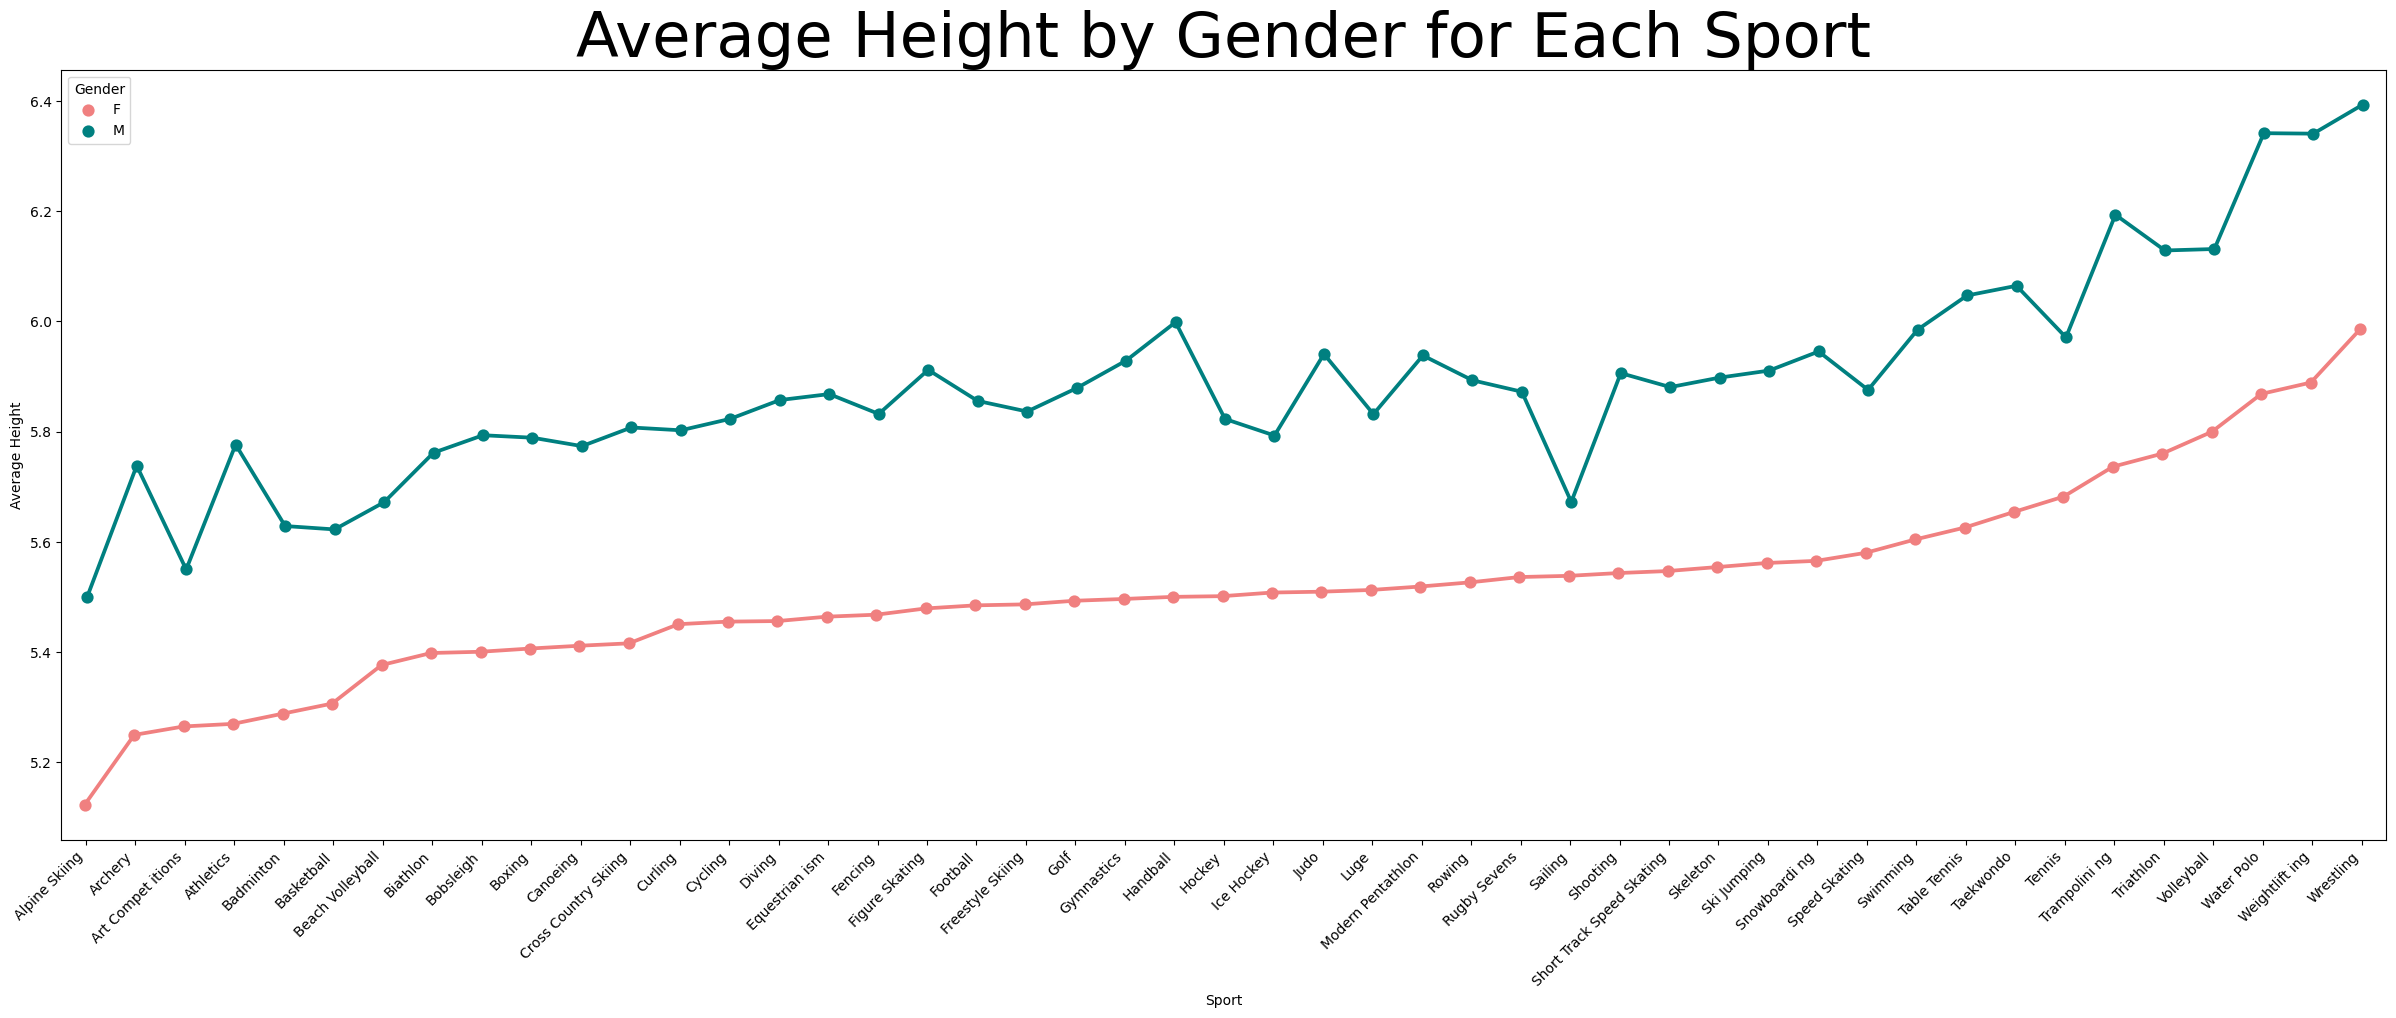

In [9]:
import math
import textwrap

df = df.dropna(subset=['Height'])
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()


max_male_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'M', 'Height'].max()
max_female_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'F', 'Height'].max()
sport_with_tallest_avg_male = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'M') & (gb_sport_sex['Height'] == max_male_height), 'Sport'].iloc[0]
sport_with_tallest_avg_female = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'F') & (gb_sport_sex['Height'] == max_female_height), 'Sport'].iloc[0]
print(f"The sport with the tallest average males is {sport_with_tallest_avg_male}, with an average height of {max_male_height:.1f} ft")
print(f"The sport with the tallest average females is {sport_with_tallest_avg_female}, with an average height of {max_female_height:.1f} ft")

sports = gb_sport_sex['Sport'].unique()

filtered_sports = [sport for sport in sports if all(gender in gb_sport_sex[gb_sport_sex['Sport'] == sport]['Sex'].values for gender in ['M', 'F'])]
custom_palette = {'M': 'teal', 'F': 'lightcoral'}
filtered_sport_sex = gb_sport_sex[gb_sport_sex['Sport'].isin(filtered_sports)]
filtered_sport_sex = filtered_sport_sex.sort_values(by='Height')

# Create the point plot with the custom palette
plt.figure(figsize=(30, 10))
sns.pointplot(data=filtered_sport_sex, x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)

# Customize the plot
plt.title('Average Height by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Average Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in filtered_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()